# Load and preprocess data 

In [1]:
#Ausschluss der Probanden HOAF_test_01 (erster test des Gesamtablaufs) und HOAF_01(kein akustischer imput möglich) 
import pandas as pd
import numpy as np
# musik_listening-Subjects: 3,5,6,14,16,19,23,26,27,28
# create .csv with Cortisol data of all music listening subjects over time
df = pd.read_csv('/home/rebekka/Documents/Doktorarbeit/Physio/Cortisol_Anova_Auschluss.csv', header=1, usecols= [1,2,3,6])
df.loc[:,('Cortisol_in_nmolproL')].astype(float)
df.loc[:,('Time')].astype(float)

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
      ... 
157    2.0
158    3.0
159    4.0
160    5.0
161    6.0
Name: Time, Length: 162, dtype: float64

In [2]:
#drop NaN
df=df.dropna()

In [3]:
print(df)

    Between_group_variable  Time Subject  Cortisol_in_nmolproL
0                    music     1  Sub-02                  9.17
1                    music     2  Sub-02                  3.84
2                    music     3  Sub-02                  4.44
3                    music     4  Sub-02                  3.34
4                    music     5  Sub-02                  4.64
..                     ...   ...     ...                   ...
157                  music     2  Sub-29                 12.31
158                  music     3  Sub-29                 16.44
159                  music     4  Sub-29                 20.14
160                  music     5  Sub-29                 23.98
161                  music     6  Sub-29                 16.44

[162 rows x 4 columns]


## Analysis of Cortisol data

## Test for normal distribution

https://statistikguru.de/spss/mixed-anova/normalverteilung-ueberpruefen-4.html

The independent variable should be normally distributed in each group. If this is the case, results can be interpreted quite easily. If not, there are several studies that verify the conduction of ANOVA even though normally distribution is not met(Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

In our study, Cortisol Saliva samples seperated into two groups showed normal distribution after beeing logharithmically transformed (p>0,05).

Die unabhängige Variable sollte bei einer mixed ANOVA für jede Gruppe und für jede Stufe des Faktors etwa normalverteilt sein. Ist dies der Fall, so lassen sich die Ergebnisse am fehlerfreisten interpretieren. Allerdings gibt es auch genügend Belege aus aktuellen Studien, dass die ANOVA robust gegenüber einer Verletzung der Normalverteilung ist (Glass, Peckham, & Sanders, 1972; Harwell, Rubinstein, Hayes, & Olds, 1992; Salkind, 2010).

Bei den gemessenen Cortisol-Werten zeigt sich zwischen den Gruppen (Musik vs Wasser) nach logharithmischer Transformation eine Normalverteilung (p>0,05).

In [4]:
# check for a normally distributed sample (normality)
import pingouin as pg
pg.normality(df, group='Between_group_variable', dv='Cortisol_in_nmolproL')

,W,pval,normal
music,0.854055,1.295552e-07,False
water,0.837247,8.251303e-08,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94eba17550>]],
      dtype=object)

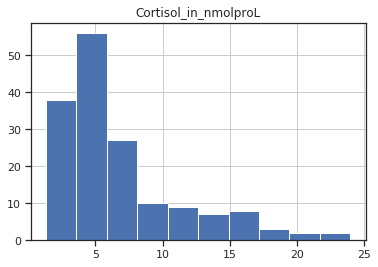

In [5]:
%matplotlib inline
df.hist(column='Cortisol_in_nmolproL')


Transformation of the data with log-transformation
Es wurde die logharithmische Verteilung gebildet.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94eb307cf8>]],
      dtype=object)

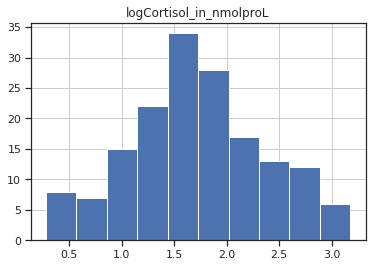

In [6]:
# create a new column containig the log of our original saliva data
# Gauss morphology
df['logCortisol_in_nmolproL']=np.log(df['Cortisol_in_nmolproL'])
df.hist(column='logCortisol_in_nmolproL')

In [19]:
# check for a normally distributed sample (normality) with log transformated data
import pingouin as pg
pg.normality(df, group='Between_group_variable', dv='logCortisol_in_nmolproL')

,W,pval,normal
music,0.977992,0.159985,True
water,0.983052,0.387584,True


In [20]:
# create df containig only subjects that listened to water sounds
df_norm_w=df.loc[(df['Between_group_variable'] == ('water'))]
print(df_norm_w)

    Between_group_variable  Time Subject  Cortisol_in_nmolproL  \
24                   water     1  Sub-07                  4.41   
25                   water     2  Sub-07                  2.76   
26                   water     3  Sub-07                  3.15   
27                   water     4  Sub-07                  5.32   
28                   water     5  Sub-07                  4.91   
..                     ...   ...     ...                   ...   
133                  water     2  Sub-25                  9.46   
134                  water     3  Sub-25                 12.69   
135                  water     4  Sub-25                 19.45   
136                  water     5  Sub-25                 19.23   
137                  water     6  Sub-25                 13.96   

     logCortisol_in_nmolproL  
24                  1.483875  
25                  1.015231  
26                  1.147402  
27                  1.671473  
28                  1.591274  
..                   

In [21]:
# create df with subjects that listened to music
df_norm_m=df.loc[(df['Between_group_variable'] == ('music'))]
print(df_norm_m)

    Between_group_variable  Time Subject  Cortisol_in_nmolproL  \
0                    music     1  Sub-02                  9.17   
1                    music     2  Sub-02                  3.84   
2                    music     3  Sub-02                  4.44   
3                    music     4  Sub-02                  3.34   
4                    music     5  Sub-02                  4.64   
..                     ...   ...     ...                   ...   
157                  music     2  Sub-29                 12.31   
158                  music     3  Sub-29                 16.44   
159                  music     4  Sub-29                 20.14   
160                  music     5  Sub-29                 23.98   
161                  music     6  Sub-29                 16.44   

     logCortisol_in_nmolproL  
0                   2.215937  
1                   1.345472  
2                   1.490654  
3                   1.205971  
4                   1.534714  
..                   

In [22]:
# test for normality in group with music intervention
import pingouin as pg
pg.normality(df_norm_m, group='Time', dv='Cortisol_in_nmolproL')

,W,pval,normal
1,0.947498,0.522586,True
2,0.886240,0.071370,True
3,0.827384,0.011110,False
4,0.902091,0.120951,True
5,0.818581,0.008551,False
6,0.822237,0.009528,False


In [23]:
#test for normality in group with water intervention
import pingouin as pg
pg.normality(df_norm_w, group='Time', dv='Cortisol_in_nmolproL')

,W,pval,normal
1,0.949705,0.593831,True
2,0.887068,0.088960,True
3,0.937935,0.430731,True
4,0.824407,0.013489,False
5,0.780540,0.004040,False
6,0.812660,0.009675,False


## Test for homoscedasticity

There was homogeneity of the error variances, as assessed by Levene’s test (p > .05) after correcting with log transformation.

Homogenität des Varianzen ist für die einzelnen Bedingungen (Gruppen) gegeben, für beide Gruppen nach log Transformation ebenfalls.

Homogenität der Fehlervarianzen der einzelnen Gruppen war gemäß dem Levene-Test für alle Variablen erfüllt (p > .05).

In [11]:
pg.homoscedasticity(df, group='Time', dv='logCortisol_in_nmolproL')

,W,pval,equal_var
levene,2.188,0.058271,True


In [12]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df_norm_w, group='Time', dv='Cortisol_in_nmolproL')

,W,pval,equal_var
levene,0.935,0.463386,True


In [13]:
# check for equal variances (homoscedasticity)
pg.homoscedasticity(df_norm_m, group='Time', dv='Cortisol_in_nmolproL')

,W,pval,equal_var
levene,1.521,0.192911,True


## Test for sphericity

Sphericity was not met. The Greenhouse–Geisser adjustment was used to correct for violations of sphericity.

Sphärizität liegt nicht vor. In der späteren ANOVA wird deswegen eine Korrektur der p-Wertes nach Greenhouse Geisser vorgenommen.

In [14]:
pg.sphericity(df, subject='Subject', dv='logCortisol_in_nmolproL', within='Time')

(False, 0.035, 80.585, 14, 2.7565906813080007e-11)

## Descriptive statistics

[]

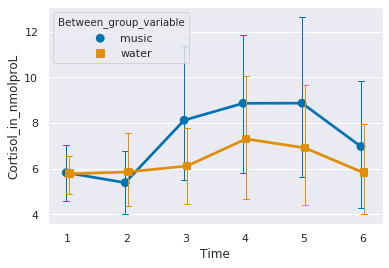

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.pointplot(data=df, x='Time', y='Cortisol_in_nmolproL', hue='Between_group_variable', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')
plt.plot()

In [17]:
df.groupby(['Time', 'Between_group_variable'])['Cortisol_in_nmolproL'].agg(['mean', 'std']).round(2)

mean   std
Time Between_group_variable            
1    music                   5.82  2.46
     water                   5.77  1.63
2    music                   5.38  2.99
     water                   5.85  3.03
3    music                   8.12  5.83
     water                   6.11  3.26
4    music                   8.86  6.27
     water                   7.30  5.34
5    music                   8.86  6.76
     water                   6.90  5.42
6    music                   6.96  5.57
     water                   5.81  4.07

# Conduct a mixed (split-plot) ANOVA with Greenhouse-Geisser corrected p-values

The Greenhouse–Geisser adjustment was used to correct for violations of sphericity.
There was no statistically significant interaction between time and group, Greenhouse–Geisser punc = 0,508, GG p=0,129, eps0,373.

Da eine Verletzung der Voraussetzung der Sphärizität vorlag, wurde eine Greenhouse–Geisser Korrektur der Freiheitsgrade vorgenommen.

Es gab keine statistisch signifikante Interaktion zwischen der Zeit und den Untersuchungsgruppen (punc=0,508, Greenhouse–Geisser p= 0,129, eps=0,373) .



In [18]:
# https://raphaelvallat.com/pingouin.html
#  dv:  A dependent variable: Cortisol
#  within: A within-group variable, Time
#  between:  A between-group variable, Group, with two levels (music, water)
#  subject:  A subject variable, Subject

# https://github.com/raphaelvallat/pingouin/blob/master/notebooks/01_ANOVA.ipynb

import pingouin as pg
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='logCortisol_in_nmolproL', within='Time', between='Between_group_variable', subject='Subject', data=df, correction=True)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source                     SS    DF1    DF2     MS      F    p-unc  p-GG-corr              np2  eps    sphericity    W-spher    p-spher
----------------------  -----  -----  -----  -----  -----  -------  -------------------  -----  -----  ------------  ---------  ----------------------
Between_group_variable  0.269      1     25  0.269  0.149    0.703  -                    0.006  -      -             -          -
Time                    1.598      5    125  0.320  2.148    0.064  0.12978207624152893  0.079  0.373  False         0.035      2.7565906813080007e-11
Interaction             0.642      5    125  0.128  0.862    0.508  -                    0.033  -      -             -          -

